In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# filter warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import load_iris
data = load_iris()

In [6]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [9]:
X =  df.drop("target", axis=1)
y= df.target

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=1)

***Decision Tree model started***

In [20]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy')
classifier

DecisionTreeClassifier(criterion='entropy')

In [21]:
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

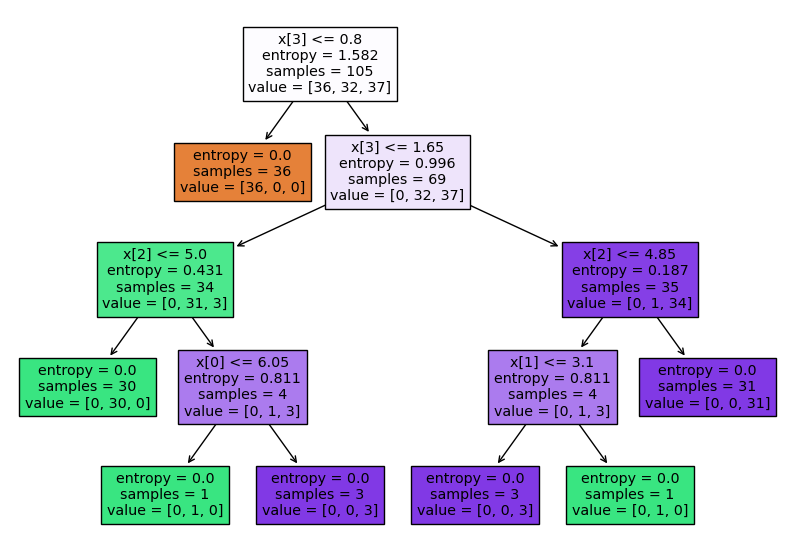

In [34]:
from sklearn import tree
plt.figure(figsize=(10,7))
tree.plot_tree(classifier,filled=True)
plt.show()

# for multi class classification entropy values can be more than 1 also

In [33]:
classifier.predict(X_test)

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 1, 2,
       1])

***post pruning***

In [35]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy' ,max_depth=2)
classifier.fit(X_train,y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=2)

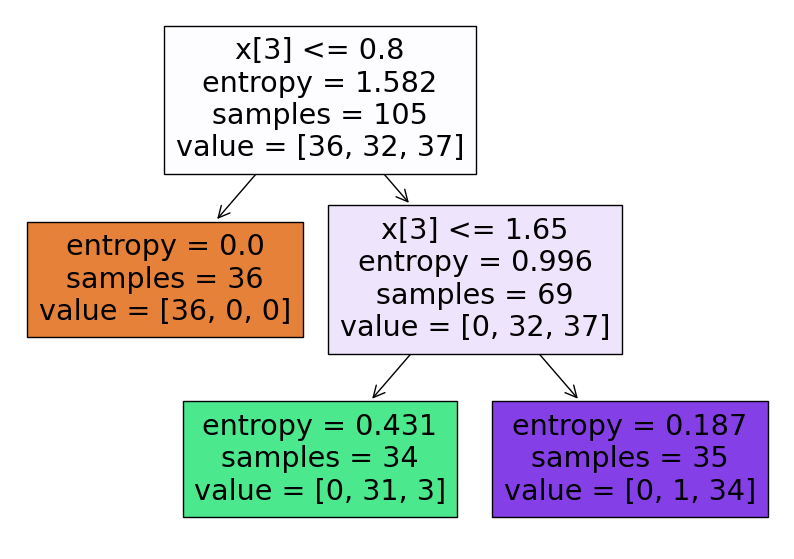

In [36]:
from sklearn import tree
plt.figure(figsize=(10,7))
tree.plot_tree(classifier,filled=True)
plt.show()

In [37]:
y_pred = classifier.predict(X_test)

In [38]:
y_pred

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 1, 2,
       1])

In [39]:
from sklearn.metrics import accuracy_score,classification_report

In [40]:
accuracy_score(y_pred,y_test)

0.9555555555555556

In [41]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      0.94      0.94        18
           2       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



***Pre Pruning (Hyperparameter tuning)***

In [45]:
parameter ={
    'criterion' :['gini', 'entropy', 'log_loss'],
    'max_depth':[1,2,3,4,6,8],
    'splitter':['best','random'],
    'max_features':['sqrt','log2']
}

    ***GridSearchCV***

In [46]:
from sklearn.model_selection import GridSearchCV
clf = DecisionTreeClassifier()
model = GridSearchCV(clf,param_grid=parameter, cv=5, scoring="accuracy")
model

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 6, 8],
                         'max_features': ['sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [47]:
model.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 6, 8],
                         'max_features': ['sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [48]:
model.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'sqrt',
 'splitter': 'random'}

In [49]:
model.best_score_

0.9904761904761905

    ***Randomized Search CV***

In [50]:
from sklearn.model_selection import RandomizedSearchCV
clf = DecisionTreeClassifier()
model = RandomizedSearchCV(clf,param_distributions=parameter, cv=5, scoring="accuracy")
model

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [1, 2, 3, 4, 6, 8],
                                        'max_features': ['sqrt', 'log2'],
                                        'splitter': ['best', 'random']},
                   scoring='accuracy')

In [51]:
model.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [1, 2, 3, 4, 6, 8],
                                        'max_features': ['sqrt', 'log2'],
                                        'splitter': ['best', 'random']},
                   scoring='accuracy')

In [52]:
model.best_params_

{'splitter': 'best',
 'max_features': 'sqrt',
 'max_depth': 4,
 'criterion': 'gini'}

In [53]:
model.best_score_

0.9523809523809523